In [ ]:
!pip install qiskit
!pip install pylatexenc

## These are steps by step of how to create a combination of assignted parameter on gates which create ansatz, and how to calculate value of the qbits. Based on these lines of code under:
# 1. **Repare, set values for "n" "m" and "params":**
> in this case: we want 5 qbits and run on repeat on 2 times so n = 5 (0 to 4) and m = 2, and there will be 3 parameters compatible to Rx, Ry and Rz
# 2. **Create a ansatz:**
> Simple understanding, an ansatz is a set of gates of a circuit, that reparing a number before using it for calculated. And in this case, its will depend on the number of qbits on the circuit ( even or odd ).

  > So we need a function that can run on 3 arguments (params,n,m) where n have even or odd conditional, m is the repeat times of using that ansatz, and params for changing the parameters
# 3. **Draw the circuit and calculate qbits**
 > Simply assign value of *ansatz(params,n,m)* to something, and using *.measure_all()* and *.draw('mql')*
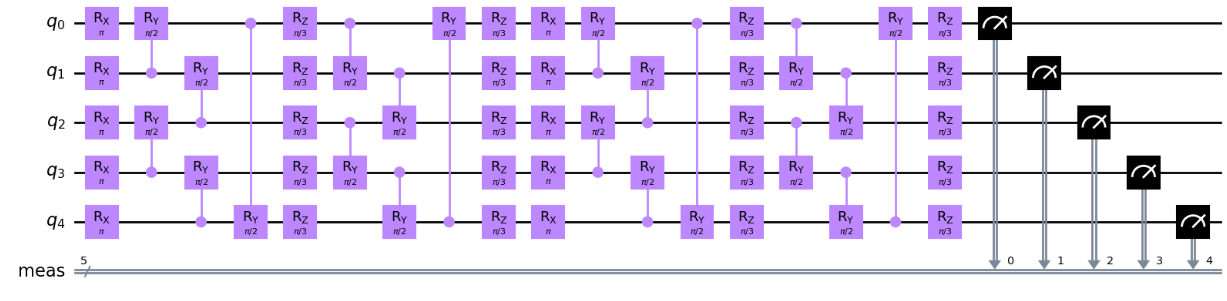

  > Again, using these lines of code

    qc.measure_all()
    sampler = Sampler()
    result = sampler.run(qc, shots=100000).result().quasi_dists[0].get(0)
    results_list.append(result)

where:
  > run(run on the circuit, using each shot to calculate its probability)

  >.quasi_dist[0].get[0] is giving out the right value in the set of values that surely its sum will equal to 1


  More to know

> Quasiprobability distributions are mathematical constructs used to represent the probabilities associated with the outcomes of quantum measurements.

  >Unlike classical probability distributions, quasiprobability distributions can have negative values in certain regions of the phase space Quasiprobability distributions are often used to analyze phenomena such as quantum coherence, quantum entanglement, and nonclassical correlations.

   >I decide to calculate 10 000 time of the values that qbit gave, to get the exact number. And using Arithmetic Mean(basic average), Weighted Mean, Median and Mode ( there are Geometric mean too) to get the most accurate value.

    Fist Result: 0.04036
    Average Result: 0.03914755000000001
    Median result:  0.03914
    Mode result:  [0.03898]


In [ ]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.primitives import Sampler
# phân loại n là số odd hay even vì sẽ có 2 trường hợp khi sắp xếp cổng Ry
def n_even(params,n,m):
  phi = qiskit.circuit.ParameterVector('phi', 3)
  qc = qiskit.QuantumCircuit(n)
  for i in range(m):
    qc.rx(phi[0], range(0,n))
    qc.barrier()
    for i in odd_numbers :
      qc.cry(phi[1], i,i-1)
    for i in even_numbers[1:] :
      qc.cry(phi[1], i,i-1)
    qc.cry(phi[1], 0,n-1)
    qc.barrier()
    qc.rz(phi[2], range(0,n))
    qc.barrier()

    for i in odd_numbers :
      qc.cry(phi[1], i-1,i)
    for i in even_numbers[1:] :
      qc.cry(phi[1], i-1,i)
    qc.cry(phi[1], n-1,0)
    qc.barrier()
    qc.rz(phi[2], range(0,n))
    qc.barrier()
    qc = qc.assign_parameters(params)

  return qc

def n_odd(params,n,m):
  phi = qiskit.circuit.ParameterVector('phi', 3)
  qc = qiskit.QuantumCircuit(n)
  for i in range(m):
    qc.rx(phi[0], range(0,n))
    qc.barrier()
    for i in odd_numbers[:-1] :
      qc.cry(phi[1], i,i-1)
    for i in even_numbers[1:] :
      qc.cry(phi[1], i,i-1)
    qc.cry(phi[1], 0,n-1)
    qc.barrier()
    qc.rz(phi[2], range(0,n))
    qc.barrier()

    for i in odd_numbers[:-1] :
      qc.cry(phi[1], i-1,i)
    for i in even_numbers[1:] :
      qc.cry(phi[1], i-1,i)
    qc.cry(phi[1], n-1,0)
    qc.barrier()
    qc.rz(phi[2], range(0,n))
    qc.barrier()
    qc = qc.assign_parameters(params)

  return qc
#vì lí do gì đó mà cái này chạy khum đc

def ansatz(params,n,m): #sau khi rõ ràng n là odd hay even thì thêm m để lặp số lần dùng ansatz trong mạch đó
  return n_even(params,n,m) if n % 2 == 0 else n_odd(params,n,m)


/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


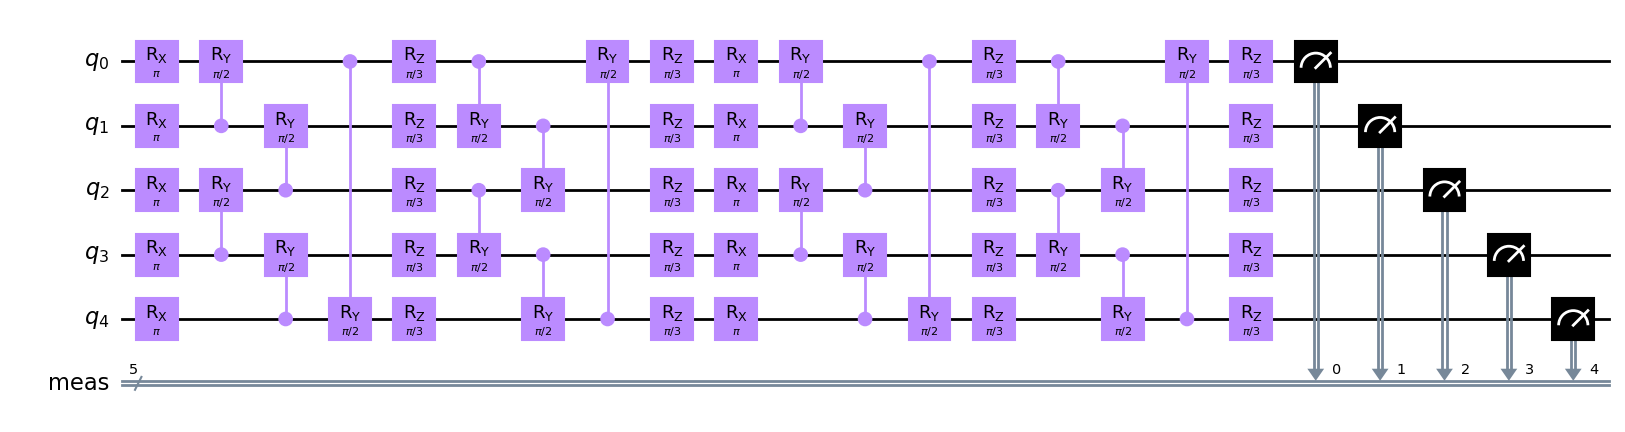

In [ ]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.primitives import Sampler

params = [np.pi, np.pi/2, np.pi/3] #asign parameter
n = 5 #số qubit
m = 2 #lần ansatz

qc = qiskit.QuantumCircuit(n)
#tùy chỉnh số gate vào qubit
even_numbers = [n for n in range(0, n) if n % 2 == 0]
odd_numbers = [n for n in range(0, n + 1) if n % 2 != 0]
# use the function as ansatz([Rx,Ry,Rz], n, m)
df = ansatz(params,n,m)
#plot
df.measure_all()
df.draw('mpl' ,plot_barriers=False) #vì xử dụng barriers để tránh hiện tượng tụt cổng, nên plot đẹp cần unplot barrier đi

In [ ]:
from collections import Counter
# đếm số cách tính trung bình của mình
params = [np.pi, np.pi/2, np.pi/3] #asign parameter
n = 5 #số qubit
m = 3 #lần ansatz
results_list = []
weights = [0.1, 0.2, 0.3, 0.4] # đinh tính tay các điểm nào gần median average hơn thì có nhiều weight hơn so với các điểm khác

def mode(lst):
    # Count the occurrences of each number in the list
    counts = Counter(lst)
    # Find the number(s) with the highest count
    max_count = max(counts.values())
    mode_list = [num for num, count in counts.items() if count == max_count]
    return mode_list

def median(lst): #calculate the average of the list
    sorted_lst = sorted(lst)
    n = len(sorted_lst)
    if n % 2 == 0:
        # If the length of the list is even, take the average of the two middle numbers
        middle_left = sorted_lst[n // 2 - 1]
        middle_right = sorted_lst[n // 2]
        median_value = (middle_left + middle_right) / 2
    else:
        # If the length of the list is odd, take the middle number
        median_value = sorted_lst[n // 2]
    return median_value

def weighted_mean(values, weights):
    if len(values) != len(weights):
        raise ValueError("Number of values and weights must be the same.")
    weighted_sum = sum(value * weight for value, weight in zip(values, weights))
    sum_of_weights = sum(weights)
    weighted_mean_result = weighted_sum / sum_of_weights
    return weighted_mean_result

# Run the code 100 times and store the results in the list
qc = ansatz(params,n,m)
qc.measure_all()
sampler = Sampler()
for _ in range(10000):
    result = sampler.run(qc, shots=100000).result().quasi_dists[0].get(0)
    results_list.append(result)

# Calculate the average of the results
median_result = median(results_list)
average_result = sum(results_list) / len(results_list)
mode_result = mode(results_list)
#weighted_mean_result = weighted_mean(results_list, weights)

# Print the average result
print("Fist Result:", results_list[0],
      "\nAverage Result:", average_result,
      "\nMedian result: ", median_result,
      "\nMode result: ", mode_result,)
#print("Weighted result:", weighted_mean_result)


#lệnh này là dùng multi threads core để tính toán nhanh hơn
"""import multiprocessing

# Define a function to run the code and return the result
def run_code():
    return sampler.run(qc, shots=100000).result().quasi_dists[0].get(0)

if __name__ == "__main__":
    # Define the number of processes (should match your CPU cores for best performance)
    num_processes = multiprocessing.cpu_count()

    # Create a multiprocessing pool
    pool = multiprocessing.Pool(processes=num_processes)

    # Use the pool to map the function across the number of processes
    results_list = pool.map(run_code, range(100))

    # Close the pool to release resources
    pool.close()
    pool.join()

    # Calculate the average of the results
    average_result = sum(results_list) / len(results_list)

    # Print the average result
    print("Average Result:", average_result)"""


Fist Result: 0.04036 
Average Result: 0.03914755000000001 
Median result:  0.03914 
Mode result:  [0.03898]


'import multiprocessing\n\n# Define a function to run the code and return the result\ndef run_code():\n    return sampler.run(qc, shots=100000).result().quasi_dists[0].get(0)\n\nif __name__ == "__main__":\n    # Define the number of processes (should match your CPU cores for best performance)\n    num_processes = multiprocessing.cpu_count()\n\n    # Create a multiprocessing pool\n    pool = multiprocessing.Pool(processes=num_processes)\n\n    # Use the pool to map the function across the number of processes\n    results_list = pool.map(run_code, range(100))\n\n    # Close the pool to release resources\n    pool.close()\n    pool.join()\n\n    # Calculate the average of the results\n    average_result = sum(results_list) / len(results_list)\n\n    # Print the average result\n    print("Average Result:", average_result)'

Bài tập 1.
1.1. Ở bài tập trước, chúng ta đã tạo được Koczor ansatz, hãy làm hai task sau:
1.1.1. Để ý là koczor ansatz bị duplicate (có nửa phần sau giống phần trước), hãy viết hàm tạo ra koczor ansatz tổng quát hơn (thêm một tham số là số layer). Ví dụ: hình ở bài tập trước có số layer = 2, cứ thêm 1 layer thì duplicate thêm một lần nữa.
1.1.2. Viết một hàm nhận vào số qubit (kiểu int), số layer (int) và giá trị tham số (kiểu np.ndarray) và trả về giá trị p_00…0 (xác suất tất cả qubit = 0) của koczor ansatz sau khi đã assign parameters.
- Tham số là vector ngẫu nhiên có kích thước phù hợp với số lượng tham số của koczor ansatz, mỗi phần tử có giá trị 0 -> 2pi.


In [ ]:
"""note của thầy Hải"""
import qiskit
import numpy as np
from qiskit.primitives import Sampler
def ansatz1(params,n):
  theta = qiskit.circuit.ParameterVector('theta', 2)
  qc = qiskit.QuantumCircuit(n)
  qc.rx(theta[0], 0)
  qc.cry(theta[1], 0, 1)
  qc = qc.assign_parameters(params)
  return qc

qc = ansatz1([np.pi/2, np.pi/3],4)
qc.measure_all()
qc.draw('mpl')


qc = ansatz1([np.pi/2, np.pi/3],4)
qc.measure_all()
sampler = Sampler()
result = sampler.run(qc,shots = 10000).result().quasi_dists[0].get(0) # bước cuối là đếm chính xác tại đâu cho ra kết quả gì
print(result)

In [ ]:
"""đếm số mẫu của thầy Hải"""
params = [np.pi, np.pi/2, np.pi/3] #asign parameter
n = 5 #số qubit
m = 3 #lần ansatz

qc = ansatz(params,n,m)
qc.measure_all()
sampler = Sampler()
result = sampler.run(qc,shots = 100000).result().quasi_dists[0].get(0)
print(result)